In [22]:
from sklearn import tree
import pandas as pd
import matplotlib as plt
import seaborn as sns
matplolib inline
from sklearn.tree import plot_tree

UsageError: Line magic function `%matplolib` not found.


In [14]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [18]:
from IPython.display import HTML
style ="<style>svg{width^70% !imoprtant;height:70% !important;}</style>"
HTML(style)

In [4]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [5]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf

DecisionTreeClassifier(criterion='entropy')

In [10]:
X = data[['X_1', 'X_2']]
y = data.Y

In [11]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

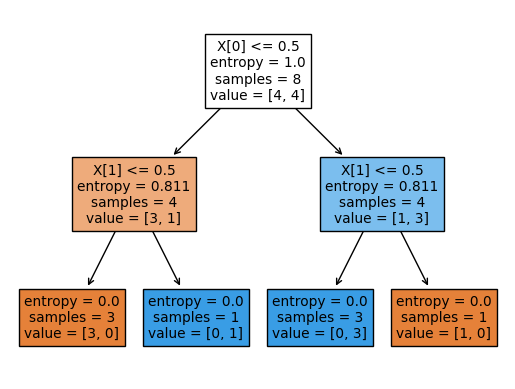

In [24]:
tree.plot_tree(clf,filled=True); 